In [ ]:
#https://stats.idre.ucla.edu/other/dae/

In [296]:
require(foreign)
require(MASS)
require(repr)
options(repr.plot.width=8, repr.plot.height=6)

In [297]:
cdata <- read.dta("https://stats.idre.ucla.edu/stat/data/crime.dta")
summary(cdata)

      sid          state               crime            murder      
 Min.   : 1.0   Length:51          Min.   :  82.0   Min.   : 1.600  
 1st Qu.:13.5   Class :character   1st Qu.: 326.5   1st Qu.: 3.900  
 Median :26.0   Mode  :character   Median : 515.0   Median : 6.800  
 Mean   :26.0                      Mean   : 612.8   Mean   : 8.727  
 3rd Qu.:38.5                      3rd Qu.: 773.0   3rd Qu.:10.350  
 Max.   :51.0                      Max.   :2922.0   Max.   :78.500  
    pctmetro         pctwhite         pcths          poverty     
 Min.   : 24.00   Min.   :31.80   Min.   :64.30   Min.   : 8.00  
 1st Qu.: 49.55   1st Qu.:79.35   1st Qu.:73.50   1st Qu.:10.70  
 Median : 69.80   Median :87.60   Median :76.70   Median :13.10  
 Mean   : 67.39   Mean   :84.12   Mean   :76.22   Mean   :14.26  
 3rd Qu.: 83.95   3rd Qu.:92.60   3rd Qu.:80.10   3rd Qu.:17.40  
 Max.   :100.00   Max.   :98.50   Max.   :86.60   Max.   :26.40  
     single     
 Min.   : 8.40  
 1st Qu.:10.05  
 Med

In [298]:
ols <- lm(crime ~ poverty + single, data=cdata)
summary(ols)


Call:
lm(formula = crime ~ poverty + single, data = cdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-811.14 -114.27  -22.44  121.86  689.82 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1368.189    187.205  -7.308 2.48e-09 ***
poverty         6.787      8.989   0.755    0.454    
single        166.373     19.423   8.566 3.12e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 243.6 on 48 degrees of freedom
Multiple R-squared:  0.7072,	Adjusted R-squared:  0.695 
F-statistic: 57.96 on 2 and 48 DF,  p-value: 1.578e-13


In [299]:
cdata[51,'poverty']
cdata[51,'single']

[1] 26.4

[1] 22.1

In [300]:
x <- 51
prd <- ols$coefficients[1] + ols$coefficients[2]*cdata[x,'poverty'] + ols$coefficients[3]*cdata[x,'single']
act <- cdata[x,'crime']
prd
act-prd

(Intercept) 
   2487.834

(Intercept) 
   434.1663

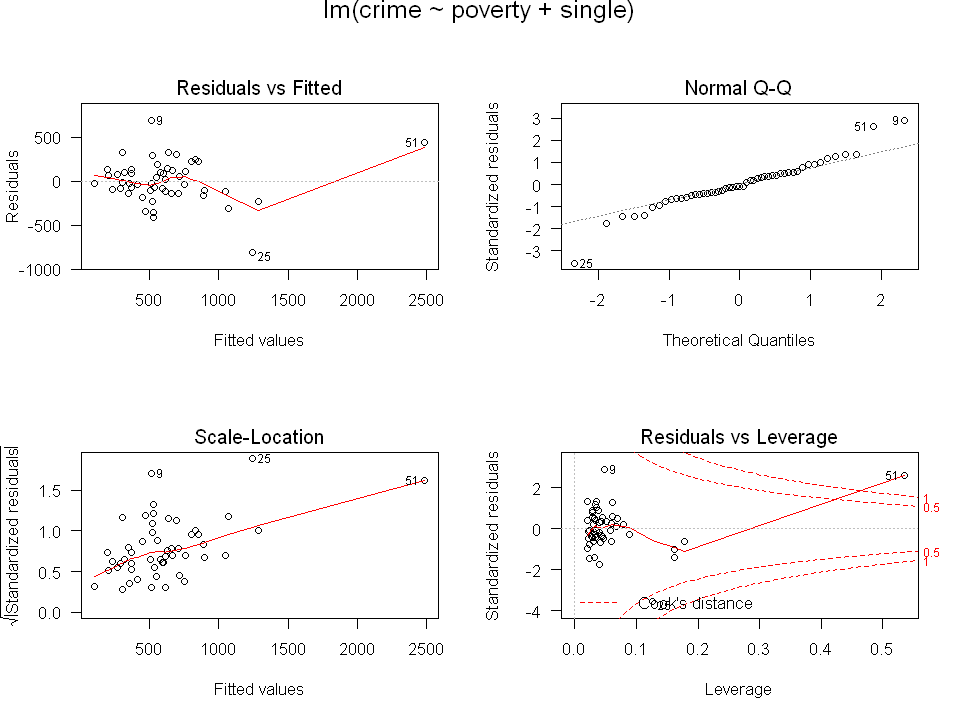

In [301]:
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(ols, las=1)

In [302]:
cdata[c(9,25,51), 1:2]

,sid,state
9,9,fl
25,25,ms
51,51,dc


In [303]:
d1 <- cooks.distance(ols)
r <- stdres(ols)
a <- cbind(cdata, d1, r)
a[d1 > 4/51,]

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,d1,r
1,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,0.1254750,-1.397418
9,9,fl,1206,8.9,93.0,83.5,74.4,17.8,10.6,0.1425891,2.902663
25,25,ms,434,13.5,30.7,63.3,64.3,24.7,14.7,0.6138721,-3.562990
51,51,dc,2922,78.5,100.0,31.8,73.1,26.4,22.1,2.6362519,2.616447


In [318]:
rabs <- abs(r)
a <- cbind(cdata, d1, r, rabs)

In [ ]:
asorted <- a[order(-rabs), ]
asorted[1:10,]

In [334]:
rr.huber <- rlm(crime ~ poverty + single, data=cdata, psi = psi.huber)
summary(rr.huber)


Call: rlm(formula = crime ~ poverty + single, data = cdata, psi = psi.huber)
Residuals:
    Min      1Q  Median      3Q     Max 
-846.09 -125.80  -16.49  119.15  679.94 

Coefficients:
            Value      Std. Error t value   
(Intercept) -1423.0373   167.5899    -8.4912
poverty         8.8677     8.0467     1.1020
single        168.9858    17.3878     9.7186

Residual standard error: 181.8 on 48 degrees of freedom

In [335]:
hweights <- data.frame(state = cdata$state, resid = rr.huber$resid, weight = rr.huber$w)
hweights2 <- hweights[order(rr.huber$w), ]
hweights2[1:15,]

,state,resid,weight
25,ms,-846.08536,0.2889618
9,fl,679.94327,0.3595480
46,vt,-410.48310,0.5955740
51,dc,376.34468,0.6494131
26,mt,-356.13760,0.6864625
21,me,-337.09622,0.7252263
31,nj,331.11603,0.7383578
14,il,319.10036,0.7661169
1,ak,-313.15532,0.7807432
20,md,307.19142,0.7958154


In [338]:
rr.bisquare <- rlm(crime ~ poverty + single, data=cdata, psi = psi.bisquare)
summary(rr.bisquare)


Call: rlm(formula = crime ~ poverty + single, data = cdata, psi = psi.bisquare)
Residuals:
    Min      1Q  Median      3Q     Max 
-905.59 -140.97  -14.98  114.65  668.38 

Coefficients:
            Value      Std. Error t value   
(Intercept) -1535.3338   164.5062    -9.3330
poverty        11.6903     7.8987     1.4800
single        175.9303    17.0678    10.3077

Residual standard error: 202.3 on 48 degrees of freedom

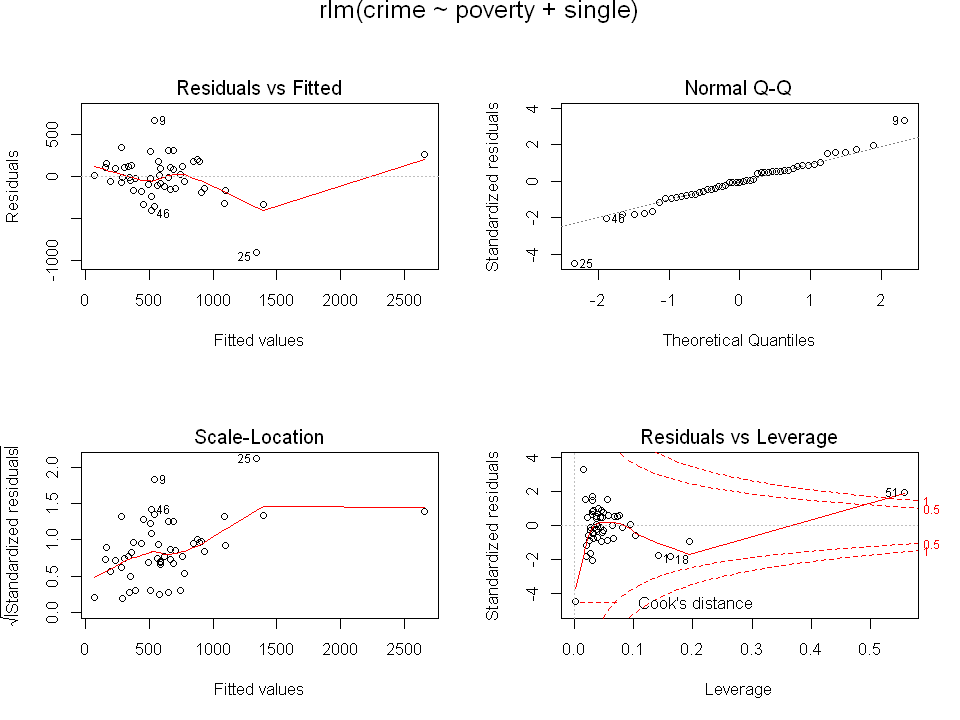

In [341]:
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(rr.bisquare)

In [340]:
biweights <- data.frame(state = cdata$state, resid = rr.bisquare$resid, weight = rr.bisquare$w)
biweights2 <- biweights[order(rr.bisquare$w), ]
biweights2[1:15,]

,state,resid,weight
25,ms,-905.5931,0.007652565
9,fl,668.3844,0.252870542
46,vt,-402.8031,0.671495418
26,mt,-360.8997,0.731136908
31,nj,345.9780,0.751347695
18,la,-332.6527,0.768938330
21,me,-328.6143,0.774103322
1,ak,-325.8519,0.777662383
14,il,313.1466,0.793658594
20,md,308.7737,0.799065530


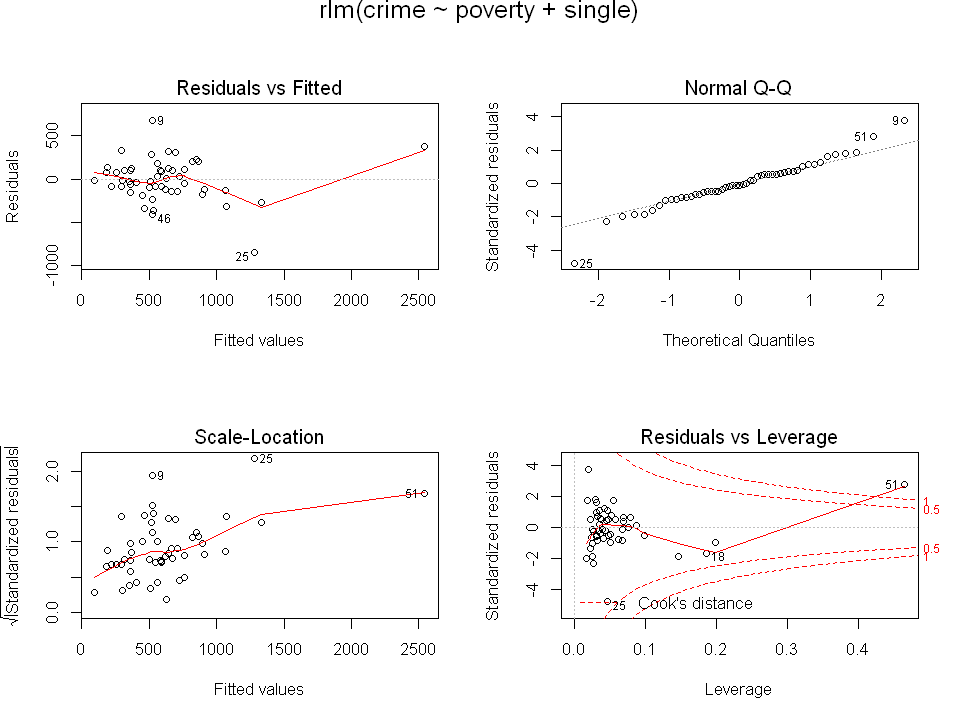

In [342]:
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(rr.huber)

In [142]:
rain <- c(12,14,13,16,18,20,19,22,22,20,23,24,26,27,28,29,30,31,26,27,28,29,30,31,20,50)
wheat <- c(310,320,323,330,334,348,352,360,370,344,370,380,385,393,395,400,403,406,383,388,392,398,400,403,270,260)
data <- cbind(rain, wheat)

In [160]:
n <- length(rain)
x_est <- sum(rain)/n
sigma_est <- sum((rain-x_est)^2)/(n-1)
print(x_est)
print(sigma_est)

[1] 24.42308
[1] 59.85385


In [166]:
model <- lm(formula = wheat ~ rain)
summary(model)


Call:
lm(formula = wheat ~ rain)

Residuals:
    Min      1Q  Median      3Q     Max 
-131.57  -18.89   14.44   28.49   36.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  334.137     26.938  12.404 6.28e-12 ***
rain           1.149      1.053   1.091    0.286    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40.74 on 24 degrees of freedom
Multiple R-squared:  0.04722,	Adjusted R-squared:  0.007518 
F-statistic: 1.189 on 1 and 24 DF,  p-value: 0.2863


In [177]:
print(quantile(model$resid, c(0, 0.25, 0.5, 0.75, 1)))

        0%        25%        50%        75%       100% 
-131.57306  -18.88834   14.44241   28.48599   36.25264 


In [180]:
print(model$residuals)

           1            2            3            4            5            6 
 -37.9216553  -30.2190978  -26.0703766  -22.5165403  -20.8139828   -9.1114253 
           7            8            9           10           11           12 
  -3.9627040    0.5911322   10.5911322  -13.1114253    9.4424110   18.2936898 
          13           14           15           16           17           18 
  20.9962473   27.8475260   28.6988048   32.5500835   34.4013623   36.2526410 
          19           20           21           22           23           24 
  18.9962473   22.8475260   25.6988048   30.5500835   31.4013623   33.2526410 
          25           26 
 -87.1114253 -131.5730626 


In [195]:
lev <- (rain - mean(rain))^2/sum((rain - mean(rain))^2) + 1/n
print(lev)

 [1] 0.14160134 0.11106542 0.12566508 0.08587585 0.06603264 0.05153579
 [7] 0.05811592 0.04238530 0.04238530 0.05153579 0.03981493 0.03858116
[13] 0.04012338 0.04289937 0.04701195 0.05246112 0.05924688 0.06736923
[19] 0.04012338 0.04289937 0.04701195 0.05246112 0.05924688 0.06736923
[25] 0.05153579 0.47564580


In [251]:
rse <- sqrt(sum((model$fit - wheat)^2)/(n-2))
print(model$res/rse/sqrt(1-lev))

          1           2           3           4           5           6 
-1.00454535 -0.78663519 -0.68428208 -0.57799735 -0.52858656 -0.22961625 
          7           8           9          10          11          12 
-0.10021199  0.01482573  0.26562795 -0.33041991  0.23650058  0.45790119 
         13          14          15          16          17          18 
 0.52596973  0.69860967  0.72151748  0.82069231  0.87049160  0.92132225 
         19          20          21          22          23          24 
 0.47586842  0.57317489  0.64609440  0.77026588  0.79457964  0.84508044 
         25          26 
-2.19528759 -4.45945089 


In [241]:
print(predict(model, data.frame(rain)))

       1        2        3        4        5        6        7        8 
347.9217 350.2191 349.0704 352.5165 354.8140 357.1114 355.9627 359.4089 
       9       10       11       12       13       14       15       16 
359.4089 357.1114 360.5576 361.7063 364.0038 365.1525 366.3012 367.4499 
      17       18       19       20       21       22       23       24 
368.5986 369.7474 364.0038 365.1525 366.3012 367.4499 368.5986 369.7474 
      25       26 
357.1114 391.5731 
       1        2        3        4        5        6        7        8 
347.9217 350.2191 349.0704 352.5165 354.8140 357.1114 355.9627 359.4089 
       9       10       11       12       13       14       15       16 
359.4089 357.1114 360.5576 361.7063 364.0038 365.1525 366.3012 367.4499 
      17       18       19       20       21       22       23       24 
368.5986 369.7474 364.0038 365.1525 366.3012 367.4499 368.5986 369.7474 
      25       26 
357.1114 391.5731 


In [248]:
sqrt(sum(model$resid^2)/(n-2))

[1] 40.7449

In [215]:
sqrt(sum((model$fit - wheat)^2)/(n-2))

[1] 40.7449

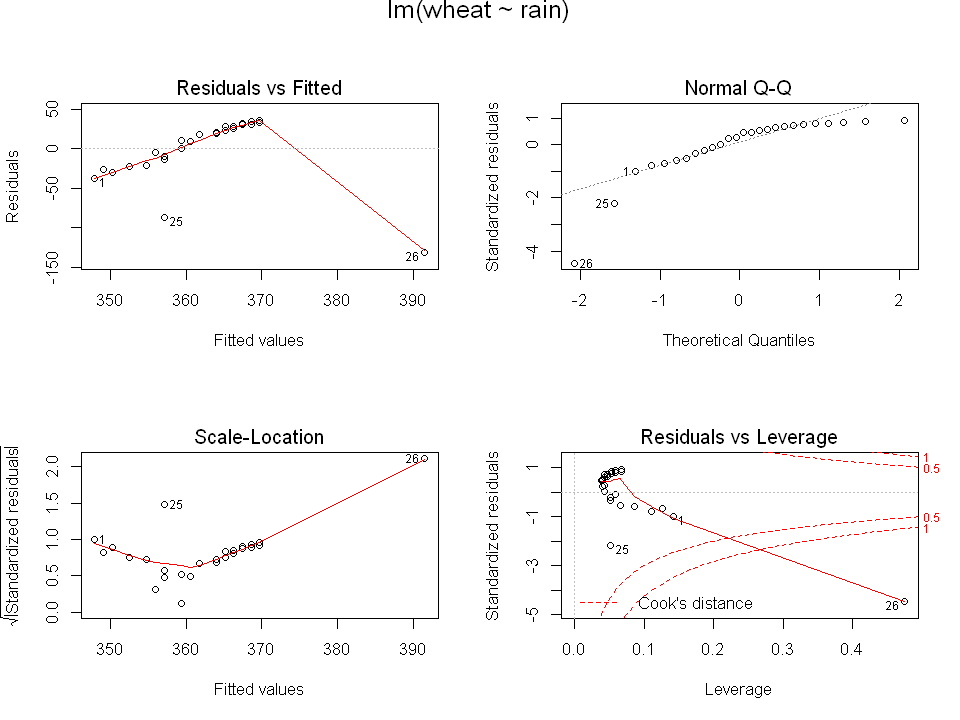

In [257]:
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(model)

In [260]:
print(cooks.distance(model))

           1            2            3            4            5            6 
8.323144e-02 3.865679e-02 3.364939e-02 1.569233e-02 9.877095e-03 1.432397e-03 
           7            8            9           10           11           12 
3.098183e-04 4.864369e-06 1.561500e-03 2.966132e-03 1.159646e-03 4.207036e-03 
          13           14           15           16           17           18 
5.781940e-03 1.093786e-02 1.284058e-02 1.864538e-02 2.386102e-02 3.065808e-02 
          19           20           21           22           23           24 
4.732884e-03 7.362709e-03 1.029634e-02 1.642449e-02 1.988084e-02 2.579396e-02 
          25           26 
1.309305e-01 9.019692e+00 


In [277]:
model2 <- lm(formula=wheat ~ rain, data=data.frame(data[-1,]))
print(predict(model2, data.frame(rain)))
print(predict(model, data.frame(rain)))

       1        2        3        4        5        6        7        8 
354.1772 355.7411 354.9592 357.3050 358.8689 360.4328 359.6509 361.9967 
       9       10       11       12       13       14       15       16 
361.9967 360.4328 362.7787 363.5606 365.1245 365.9065 366.6884 367.4704 
      17       18       19       20       21       22       23       24 
368.2523 369.0343 365.1245 365.9065 366.6884 367.4704 368.2523 369.0343 
      25       26 
360.4328 383.8913 
       1        2        3        4        5        6        7        8 
347.9217 350.2191 349.0704 352.5165 354.8140 357.1114 355.9627 359.4089 
       9       10       11       12       13       14       15       16 
359.4089 357.1114 360.5576 361.7063 364.0038 365.1525 366.3012 367.4499 
      17       18       19       20       21       22       23       24 
368.5986 369.7474 364.0038 365.1525 366.3012 367.4499 368.5986 369.7474 
      25       26 
357.1114 391.5731 


In [295]:
print(model$resid^2*lev/(1-lev)^2/s1^2/2)

           1            2            3            4            5            6 
8.323144e-02 3.865679e-02 3.364939e-02 1.569233e-02 9.877095e-03 1.432397e-03 
           7            8            9           10           11           12 
3.098183e-04 4.864369e-06 1.561500e-03 2.966132e-03 1.159646e-03 4.207036e-03 
          13           14           15           16           17           18 
5.781940e-03 1.093786e-02 1.284058e-02 1.864538e-02 2.386102e-02 3.065808e-02 
          19           20           21           22           23           24 
4.732884e-03 7.362709e-03 1.029634e-02 1.642449e-02 1.988084e-02 2.579396e-02 
          25           26 
1.309305e-01 9.019692e+00 


In [287]:
w2 <- predict(model2, data.frame(rain))
w1 <- predict(model, data.frame(rain))
s1 <- sqrt(sum(model$resid^2)/(n-2))
sum((w1-w2)^2)/s1^2/2

[1] 0.08323144